<a href="https://colab.research.google.com/github/abishekP101/Pytorch/blob/main/RiceTypeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abishek11prasad
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 474MB/s]

In [ ]:
{"username":"abishek11prasad","key":"0f0de555bf2b3a07d095cb1aac36a121"}

In [2]:
import torch
import pandas as pd
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
from torch.utils.data import DataLoader , Dataset
import numpy as np
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
print(device)

cuda


In [6]:
data = pd.read_csv('rice-type-classification/riceClassification.csv')

In [7]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [8]:
data.shape


(18185, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [10]:
data.drop(columns=['id'] , inplace=True)

In [11]:
data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
11065,5463,159.602024,44.675883,0.960023,5658,83.400885,0.431892,349.574,0.561776,3.572442,1
17578,7140,147.767261,62.301502,0.906773,7387,95.346370,0.644637,349.886,0.732917,2.371809,0
11342,7514,142.791627,68.024975,0.879232,7698,97.811666,0.767361,346.189,0.787870,2.099106,0
5901,7674,137.014787,72.359344,0.849174,7906,98.847561,0.648690,356.959,0.756824,1.893533,0
4361,6294,152.995320,52.969325,0.938155,6458,89.519661,0.520466,345.596,0.662215,2.888376,1
919,6810,151.591445,58.350585,0.922950,6968,93.116923,0.683323,349.845,0.699207,2.597942,1
15209,7054,143.438165,64.027302,0.894846,7352,94.770416,0.765408,345.850,0.741088,2.240266,0
5272,5690,148.256187,50.352958,0.940557,5867,85.115997,0.472042,330.860,0.653181,2.944339,1
4789,4097,126.128635,43.287804,0.939261,4347,72.225082,0.649596,287.148,0.624402,2.913722,1
6624,4756,137.432810,45.454905,0.943721,4920,77.817268,0.542737,306.146,0.637668,3.023498,1


In [12]:
data.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0
AspectRation,0


In [13]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [14]:
data['Class'].value_counts()

,count
Class,
1,9985
0,8200


In [15]:
# Separate features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the testing data into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Convert the scaled features back to DataFrames (optional, but good for inspection)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)


# Display the first few rows of the scaled training data
display(X_train_scaled_df.head())

# Display the first few rows of the scaled testing data
display(X_test_scaled_df.head())

# Display the first few rows of the scaled validation data
display(X_val_scaled_df.head())

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,1.139971,-0.050142,1.434923,-1.454182,1.219911,1.127578,0.869665,0.953918,0.752266,-1.296919
1,1.744334,1.364553,1.362634,-0.505893,1.760142,1.655689,-0.085628,1.627598,0.693525,-0.702476
2,0.416101,-0.280294,0.650331,-0.693049,0.370213,0.458298,-0.055386,0.000392,1.027584,-0.839409
3,-0.520150,-0.061072,-0.625091,0.640617,-0.546179,-0.480590,-0.854234,-0.348510,-0.464550,0.507520
4,1.294988,0.242972,1.451844,-1.264423,1.309282,1.265504,-0.283833,0.809437,1.310880,-1.195408


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,-2.434991,-4.895169,-0.999482,-2.547738,-2.455664,-2.797789,2.245470,-4.184369,1.929839,-1.768523
1,-0.897109,-1.475457,-0.456962,-0.166065,-0.930344,-0.887414,-0.217254,-1.481486,0.751606,-0.420384
2,-1.021396,-1.127321,-0.735044,0.304690,-0.979031,-1.025821,0.184487,-0.951643,-0.637610,0.064962
3,1.941691,2.001068,1.201872,-0.070347,1.868188,1.822818,1.594382,1.902159,0.576852,-0.331735
4,-0.055098,1.065770,-0.532248,0.931047,-0.062639,-0.002637,-1.345868,0.540433,-0.907652,0.985681


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,0.833350,-0.270353,1.223867,-1.357702,0.835079,0.849359,1.181690,0.492352,0.981214,-1.246208
1,-1.062369,-1.172321,-0.736791,0.285555,-1.042392,-1.071947,1.244770,-1.186222,-0.312200,0.042532
2,-0.632145,-0.293702,-0.666758,0.589758,-0.640220,-0.599519,-1.048165,-0.715269,-0.075210,0.433902
3,1.254697,1.038834,0.945075,-0.276034,1.223912,1.229826,0.309850,1.143363,0.638771,-0.516929
4,0.917347,0.707085,0.772623,-0.275770,0.960466,0.926312,-0.851535,1.005117,0.243824,-0.516703


In [16]:
class dataset(Dataset):
  def __init__(self , X , y):
    self.X = torch.tensor(X , dtype = torch.float32).to(device)
    self.y = torch.tensor(y , dtype = torch.float32).to(device)


  def __len__(self):
    return len(self.X)

  def __getitem__(self , idx):

    return self.X[idx] , self.y[idx]

In [17]:
training_dataset = dataset(X_train_scaled , y_train.values)
testing_dataset = dataset(X_test_scaled , y_test.values)
validation_dataset = dataset(X_val_scaled , y_val.values)

In [18]:
train_loader = DataLoader(training_dataset , batch_size=32 , shuffle=True)
test_loader = DataLoader(testing_dataset , batch_size=32 , shuffle=False)
validation_loader = DataLoader(validation_dataset , batch_size=32 , shuffle=False)

In [19]:
class riceClassification(nn.Module):
  def __init__(self , input_features):
    super(riceClassification , self).__init__()
    self.network = nn.Sequential(
        nn.Linear(input_features , 20),
        nn.ReLU(),
        nn.Linear(20 , 10),
        nn.ReLU(),
        nn.Linear(10 , 1),
        nn.Sigmoid()
    )

  def forward(self , X):
    return self.network(X)

In [20]:
model = riceClassification(X.shape[1])
model.to(device)

riceClassification(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [21]:
summary(model, (X.shape[1] , ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]             220
              ReLU-2                   [-1, 20]               0
            Linear-3                   [-1, 10]             210
              ReLU-4                   [-1, 10]               0
            Linear-5                    [-1, 1]              11
           Sigmoid-6                    [-1, 1]               0
Total params: 441
Trainable params: 441
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [22]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters() , lr=0.001)

In [23]:
from functools import total_ordering
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10
for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_validation = 0
  total_loss_validation = 0
  model.train()
  for X_batch , y_batch in train_loader:
    y_pred = model(X_batch)
    loss = criterion(y_pred , y_batch.unsqueeze(1))
    total_loss_train += loss.item()
    acc = ((y_pred > 0.5).float() == y_batch.unsqueeze(1)).float().mean()
    total_acc_train += acc.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  model.eval()
  with torch.no_grad():
    for X_batch_val , y_batch_val in validation_loader:
        y_pred_val = model(X_batch_val)
        loss_val = criterion(y_pred_val , y_batch_val.unsqueeze(1))
        total_loss_validation += loss_val.item()
        acc_val = ((y_pred_val > 0.5).float() == y_batch_val.unsqueeze(1)).float().mean()
        total_acc_validation += acc_val.item()

  avg_train_loss = total_loss_train / len(train_loader)
  avg_train_acc = total_acc_train / len(train_loader)
  avg_val_loss = total_loss_validation / len(test_loader)
  avg_val_acc = total_acc_validation / len(test_loader)

  total_loss_train_plot.append(avg_train_loss)
  total_loss_validation_plot.append(avg_val_loss)
  total_acc_train_plot.append(avg_train_acc)
  total_acc_validation_plot.append(avg_val_acc)

  print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}')

Epoch 1: Train Loss: 0.1497, Train Acc: 0.9493, Val Loss: 0.0503, Val Acc: 0.9823
Epoch 2: Train Loss: 0.0382, Train Acc: 0.9870, Val Loss: 0.0475, Val Acc: 0.9840
Epoch 3: Train Loss: 0.0362, Train Acc: 0.9882, Val Loss: 0.0453, Val Acc: 0.9845
Epoch 4: Train Loss: 0.0353, Train Acc: 0.9885, Val Loss: 0.0431, Val Acc: 0.9845
Epoch 5: Train Loss: 0.0347, Train Acc: 0.9887, Val Loss: 0.0436, Val Acc: 0.9873
Epoch 6: Train Loss: 0.0343, Train Acc: 0.9891, Val Loss: 0.0421, Val Acc: 0.9856
Epoch 7: Train Loss: 0.0335, Train Acc: 0.9890, Val Loss: 0.0419, Val Acc: 0.9856
Epoch 8: Train Loss: 0.0333, Train Acc: 0.9894, Val Loss: 0.0404, Val Acc: 0.9878
Epoch 9: Train Loss: 0.0331, Train Acc: 0.9896, Val Loss: 0.0407, Val Acc: 0.9873
Epoch 10: Train Loss: 0.0325, Train Acc: 0.9894, Val Loss: 0.0402, Val Acc: 0.9867


In [24]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0

  for X_batch_test , y_batch_test in test_loader:
    y_pred_test = model(X_batch_test)
    loss_test = criterion(y_pred_test , y_batch_test.unsqueeze(1))
    total_loss_test += loss_test.item()
    acc_test = ((y_pred_test > 0.5).float() == y_batch_test.unsqueeze(1)).float().mean()
    total_acc_test += acc_test.item()


  print(f'Test Loss: {total_loss_test / len(test_loader):.4f}, Test Acc: {total_acc_test / len(test_loader):.4f}')

Test Loss: 0.0257, Test Acc: 0.9901


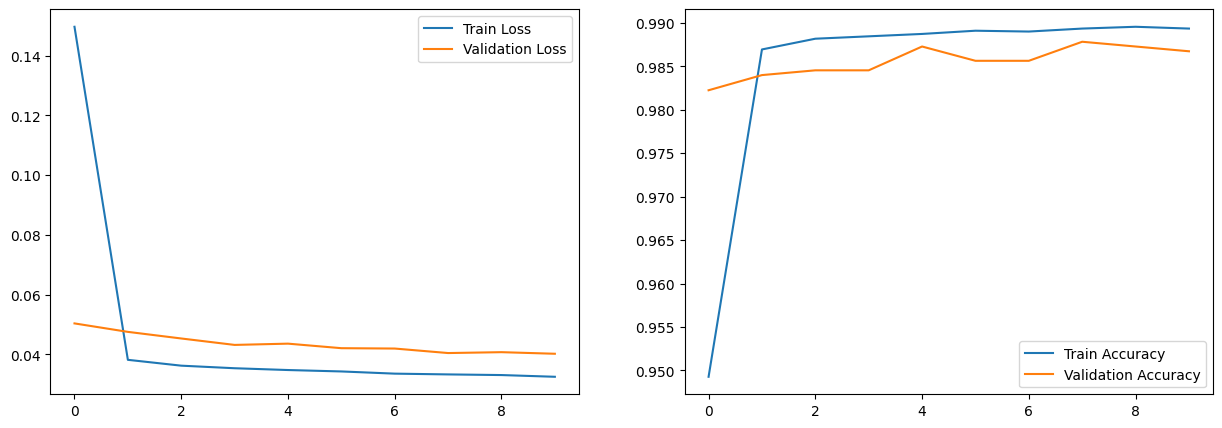

In [27]:
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 5))
axs[0].plot(total_loss_train_plot , label = 'Train Loss')
axs[0].plot(total_loss_validation_plot , label = 'Validation Loss')
axs[0].legend()

axs[1].plot(total_acc_train_plot , label = 'Train Accuracy')
axs[1].plot(total_acc_validation_plot , label = 'Validation Accuracy')
axs[1].legend()


In [28]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
